# Fitting nonlinear and linear models

In this notebook, we will be exploring the difference between fitting nonlinear and linearized models.

Nonlinear model fitting (which we covered last week) tries to match a function over some number inputs (x, or x, y) with some number of parameters to a set of data. One example is a Gaussian function, $f(x) = e^{\frac{-(x-\mu)^2}{2\sigma}}$ ). This approach is generally taken when a strong hypothesis exists about the nonlinear relationships between variables in a data set. For example, this is the approach taken to estimate the parameters of population receptive fields in early visual cortex, given a strong hypothesis that the pRFs can be modeled as circular Gaussian functions. Nonliner curve fitting estimates values for the parameters (i.e., the variable that are not the inputs) in the hypothesized function. In the Gaussian example given above, this would be one value for $\mu$, and one value for $\sigma$; or, for a 2D spatial pRF, it would be one value for $\mu_x$, one value for $\mu_y$, and one value for $\sigma$. 

Nonlinear model fitting, as we will see, is tricky. For nonlinear functions (such as a Gaussian), there is no guarantee that the estimate of the parameters for a given fit provides the *best possible fit* to the data.

In this notebook, we will generate some data from a parametric function (a Gaussian), fit it with several polynomial functions, and evaluate which gives the best fit (just like we did last week). Then we will further explore WHY the fits for some functions are unstable.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Curve fitting optimization
from scipy import optimize

# For display of error surface in 3D plots
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

### Step 1: generate some data
We want some data that has some real, underlying, parametric model. We will use the same 1D Gaussian model that we used last week.

In [2]:
# Here's a function to define a 1D Gaussian curve:
def gauss(x, mu, sigma, amp=1):
    """Estimate value of Gaussian function for specific value or values of x
    Parameters
    ----------
    x : scalar or array-like
        value or values at which to evaluate the Gaussian
    mu : scalar
        mean of Gaussian
    sigma : scalar
        std of Gaussian
    amp : amplitude of Gaussian
    
    Returns
    -------
    valueof Gaussian at `x`
    """
    return amp * np.e**(-(x-mu)**2 / (2*sigma))



Here we pick a `mu` and `sigma` value, and decide which X values to use. We define `y` as the output of the `gauss()` function (with the `x`, `mu`, and `sigma` values as parameters) plus some noise. Then we make a scatter plot of `x` vs `y`. 

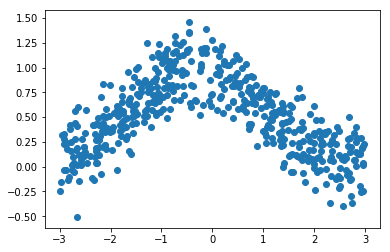

In [33]:
n = 500
x = np.random.uniform(low=-3, high=3, size=(n,))
mu = -0.3
sigma = 1.5

y_perfect = gauss(x, mu=mu, sigma=sigma, amp=1)
noise = np.random.normal(loc=0, scale=0.2, size=y_perfect.shape)
y = y_perfect + noise
plt.scatter(x, y,)

Now, we will fit two different functions to the data, a Gaussian and sine function. First, we will define the sine function, then we will do the fits.

In [4]:
# Define sine function for fitting
def sinx(x, freq, phase, amp=1):
    return np.sin(x * 2 * np.pi * freq + phase) * amp

# Fit gaussian function
gauss_guess = [1, 3, 1] # values for mu, sigma, amp
params_gauss, pcov = optimize.curve_fit(gauss, x, y, p0=gauss_guess)
mu_est, sig_est, ampg_est = params_gauss

# Fit sine function
sin_guess1 = [1, 0, 1] # values for freq, phase, amp
params_sin1, pcov = optimize.curve_fit(sinx, x, y, p0=sin_guess1)
freq_est1, phase_est1, amps_est1 = params_sin1

# Fit sine function with a different guess for starting parameters
sin_guess2 = [0.3, .25* np.pi, 1] # values for freq, phase, amp
params_sin2, pcov = optimize.curve_fit(sinx, x, y, p0=sin_guess2)
freq_est2, phase_est2, amps_est2 = params_sin2

In [5]:
# OOPSIES, these are different!
print(params_sin1)
print(params_sin2)

[ 0.9637346  -0.53491491 -0.14206191]
[-0.09144984  1.44644091  0.88585806]


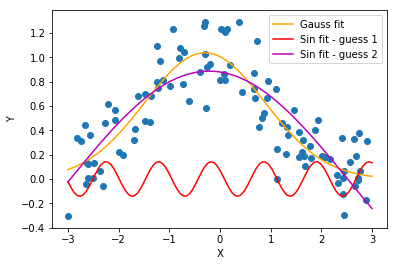

In [6]:
# Plot results
# Compute predictions on evenly spaced x data
xtest = np.linspace(-3, 3, 101)
gtest = gauss(xtest, mu_est, sig_est, ampg_est)
stest1 = sinx(xtest, freq_est1, phase_est1, amps_est1)
stest2 = sinx(xtest, freq_est2, phase_est2, amps_est2)

# Plot data & predictions
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(xtest, gtest, color='orange', label='Gauss fit')
ax.plot(xtest, stest1, color='r', label='Sin fit - guess 1')
ax.plot(xtest, stest2, color='m', label='Sin fit - guess 2')
ax.legend(loc='best')
ax.set_xlabel('X')
ax.set_ylabel('Y');

The second guess at the sine fit is much better than the first guess. The error for that function is lower, too! WHY?? Is this fitting algorithm good for nothing? 

Let's play a game. Let's see how the parameter estimates for the sinx function vary with different starting guesses. 

> Write a loop to collect parameter estimates for different guesses at the frequency of the sin function (keep phase constant for now). See how many different values for the freq_est and phase_est you get!

In [9]:
# Answer
freq_guesses = np.linspace(0, 1, 100)

for fg in freq_guesses:
    sg = [fg, 0, 1] # values for freq, phase, amp
    estimated_parameters, pcov = optimize.curve_fit(sinx, x, y, p0=sg)
    print(estimated_parameters)


[-0.09144982  1.446441    0.88585795]
[-0.09144982  1.44644099  0.88585795]
[-0.09144984  1.44644091  0.88585805]
[-0.0914498   1.44644123  0.88585788]
[-0.09144983  1.44644099  0.885858  ]
[-0.09144983  1.44644096  0.88585802]
[-0.09144982  1.44644112  0.88585798]
[-0.09144984  1.44644096  0.88585803]
[-0.09144988  1.44644059  0.88585823]
[0.09144985 1.6951518  0.88585809]
[0.09144983 1.6951517  0.88585802]
[0.09144982 1.69515161 0.88585794]
[0.09144982 1.69515165 0.88585796]
[0.09144989 1.69515252 0.88585832]
[0.09144982 1.69515167 0.88585795]
[0.09144989 1.69515236 0.88585831]
[ 0.09144986 -1.44644083 -0.88585813]
[ 0.09144975 -1.44644105 -0.88585766]
[ 0.09144984 -1.44644096 -0.88585805]
[ 0.09144981 -1.44644107 -0.88585793]
[ 0.09144982 -1.44644104 -0.88585794]
[ 0.09144984 -1.4464409  -0.88585806]
[ 0.09144983 -1.44644096 -0.88585801]
[-0.0914499  -1.69515253 -0.88585837]
[-0.09144974 -1.69515102 -0.88585757]
[-0.09144984 -1.69515161 -0.88585806]
[-0.09144982 -1.69515139 -0.88585

> Do the same for the `gauss` function. Do different guesses for `mu` yield different parameter results?

In [12]:
# Answer
# Answer
mu_guesses = np.linspace(0, 1, 10)

for mg in mu_guesses:
    param_guess = [mg, 1, 1] # values for freq, phase, amp
    estimated_parameters, pcov = optimize.curve_fit(gauss, x, y, p0=param_guess)
    print(estimated_parameters)


[-0.29596389  1.40688624  1.0367568 ]
[-0.29596423  1.40688407  1.03675722]
[-0.2959639   1.40688607  1.03675683]
[-0.29596392  1.40688588  1.03675687]
[-0.29596391  1.40688594  1.03675685]
[-0.29596375  1.40688723  1.03675661]
[-0.29596385  1.40688639  1.03675677]
[-0.29596386  1.4068863   1.03675679]
[-0.29596419  1.40688372  1.03675728]
[-0.29596395  1.40688563  1.03675691]


# Visualize the error surface

The reason that initial guesses can affect parameter estimates differently is that the fitting function is *iterative*. It assesses whether the error for a given stage is better or worse than at the last stage. As soon as the error starts getting worse, the algorithm decides that it's found an error minimum, and returns parameter estimates. This means that the algorithm sometimes gets stuck in *local minima* that are not the *global minimum* for error. The following plots will show you what that means:

## Gauss error surface
> Write in comments above each of these lines saying what they do!

In [13]:

nmu = 11
nsig = 11

mu_vals = np.linspace(-2, 2, nmu)

sigma_vals = np.linspace(0.1, 4, nsig)

error_surface_gauss = np.zeros((nmu, nsig))

for imu, mu_ in enumerate(mu_vals):

    for isig, sigma_ in enumerate(sigma_vals):
        
        g = gauss(x, mu_, sigma_, amp=1)
        
        resids = np.sum((y-g)**2)
        
        error_surface_gauss[imu, isig] = resids
        

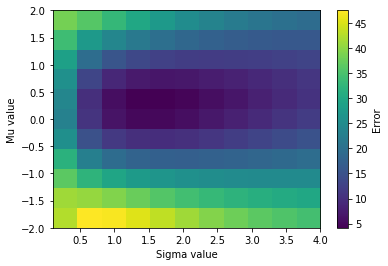

In [14]:
fig, ax = plt.subplots()
im = ax.imshow(error_surface_gauss, extent=[0.1, 4, -2, 2], aspect='auto')
ax.set_xlabel('Sigma value')
ax.set_ylabel('Mu value')
cb = fig.colorbar(im)
cb.set_label('Error')

This error surface is reasonably well behaved - there is one big dip in the middle of this range of guesses, which is at the value of the true parameters. No matter where you start, an iterative process will converge on that minimum.

# sin error surface

In [20]:
# Parameter guesses
nf = 100
nph = 100
freq_vals = np.linspace(0, 1.0, nf)
phase_vals = np.linspace(0, np.pi*2, nph)
# Initialize error surface
error_surface_sin = np.zeros((nf, nph))
for ifreq, freq_ in enumerate(freq_vals):
    for iphase, phase_ in enumerate(phase_vals):
        # Compute prediction
        yhat = sinx(x, freq_, phase_, amp=1)
        # Compute residuals
        resids = np.sum((y-yhat)**2)
        error_surface_sin[ifreq, iphase] = resids

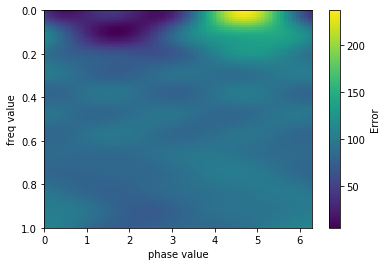

In [21]:
# Show error surface, simpler
fig, ax = plt.subplots()
im = ax.imshow(error_surface_sin, extent=[0, np.pi*2, 1.0, 0], aspect='auto')
ax.set_xlabel('phase value')
ax.set_ylabel('freq value')
cb = fig.colorbar(im)
cb.set_label('Error')

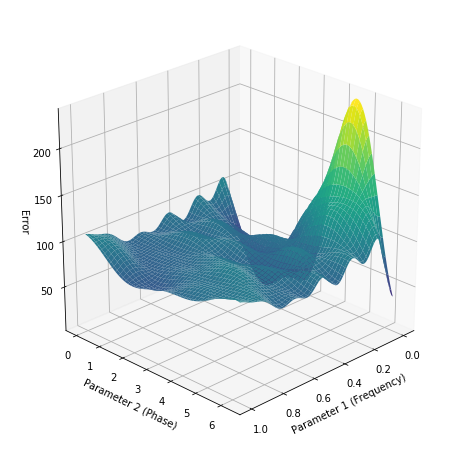

In [22]:
# Show error surface, fancier
yg, xg = np.meshgrid(phase_vals, freq_vals)
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(projection='3d', azim=45, elev=25))
ax.plot_surface(xg, yg, error_surface_sin, cmap='viridis', shade=False)
ax.set_xlabel('Parameter 1 (Frequency)')
ax.set_ylabel('Parameter 2 (Phase)')
ax.set_zlabel('Error');

The sin error surface is NOT convex / smooth... Lots of local minima! This is why different guesses result in different parameter estimtes - the algorithm "falls into" one of the dips (local minima) in the in the error surface, and assumes those are the best parameters.

# Linearized regression models
These unstable error surfaces are a big reason that many researchers use linear regression models. Linear models are guararanteed to have convex error surfaces over their paramters, meaning you will ALWAYS get the best estimate you can. This can mean that your estimate of your parameters - your $\beta$ weights - are TOO good, though - so you still have to guard against over-fitting to noise. 

Here, we will explore how to make a lineari*ized* model of the gaussian data used above. For a linearized model, you basically take a bunch of guesses at the potential nonlinear parameters, and then use each guess as a regressor in your design matrix. 

That means, in this case,we will guess at a bunch of gaussians with different values for mu and sigma.

In [26]:
mu_vals

array([-2. , -1.6, -1.2, -0.8, -0.4,  0. ,  0.4,  0.8,  1.2,  1.6,  2. ])

In [34]:
# LinearIZED model
# NOTE: sigma_vals and mu_vals are the same we used above to explore the error surface.
gausses = []
for sigma_ in sigma_vals:
    for mu_ in mu_vals:
        this_regressor = gauss(x, mu_, sigma_)
        gausses.append(this_regressor)
# Combine all guesses in a single array
Xreg = np.vstack(gausses).T

In [35]:
Xreg.shape

(500, 121)

In [36]:
# Ridge regression function.
# Note that with a = 0, this is THE SAME as OLS regression!
def ridge(X, Y, a=0):
    b = np.linalg.inv(X.T.dot(X) + a * np.eye(X.shape[1])).dot(X.T.dot(Y))
    return b

In [54]:
# Estimate beta weights for each of the predictors above (one per assumed Gaussian function)
B_est = ridge(Xreg, y, a=100) # Start with a = 0 for OLS regression

> What is the size of beta? 

> Make a histogram plot of `B_est`

(121,)


(array([ 6., 12., 14., 18., 10., 21., 13., 12.,  8.,  7.]),
 array([-0.01597697, -0.01104257, -0.00610817, -0.00117378,  0.00376062,
         0.00869501,  0.01362941,  0.01856381,  0.0234982 ,  0.0284326 ,
         0.03336699]),
 <a list of 10 Patch objects>)

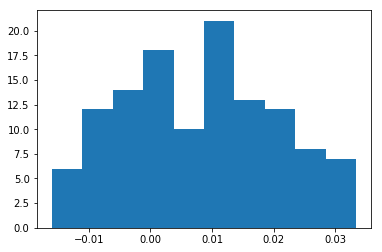

In [55]:
# Answer
print(B_est.shape)
plt.hist(B_est)

Now we can test the predictions of the regression model, within-set and out-of-set

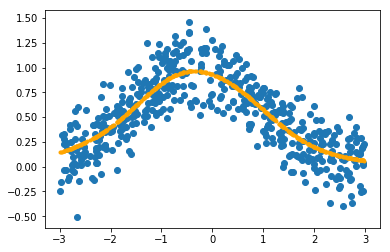

In [56]:
# Within set prediction: predict the y values above
yhat_reg = Xreg.dot(B_est)
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, yhat_reg, '.', color='orange')

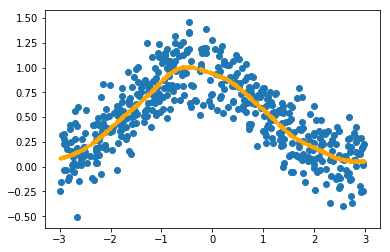

In [42]:
# Within set prediction: predict the y values above
yhat_reg = Xreg.dot(B_est)
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, yhat_reg, '.', color='orange')

Hmm. That's rough. Change the alpha value above (to anyting > 0) and see what happens.

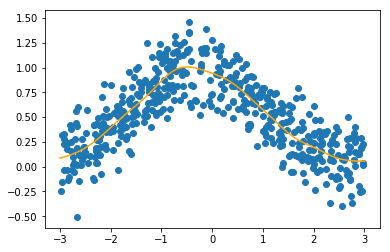

In [43]:
# out-of-set prediction (to evenly spaced test values)
gausses_test = []
for sigma_ in sigma_vals:
    for mu_ in mu_vals:
        this_regressor = gauss(xtest, mu_, sigma_)
        gausses_test.append(this_regressor)
# Combine all guesses in a single array
Xtest = np.vstack(gausses_test).T
# Make predictions of evenly spaced x data
yhat_reg = Xtest.dot(B_est)
# Plot the results!
plt.scatter(x, y)
plt.plot(xtest, yhat_reg, color='orange')

We can inspect the beta weights to see what we've done. Remember, each beta reflects an individual Guassian function with different parameters for mu and theta. So let's reshape B_est to be (mu_values x sigma_values)

> Reshape B_est as suggested above, and display it!

In [51]:
print(mu_vals)
print(sigma_vals)

[-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
[0.1  0.49 0.88 1.27 1.66 2.05 2.44 2.83 3.22 3.61 4.  ]


(11, 11)
(11, 11)


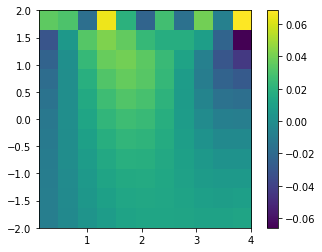

In [53]:
# Answer
B_r = B_est.reshape(11, 11)
# equivalently:
B_r2 = np.reshape(B_est, (11,11))
print(B_r.shape)
print(B_r2.shape)

plt.imshow(B_r, extent=(-2, 2, 0.1, 4))
plt.colorbar()

(11, 11)
(11, 11)


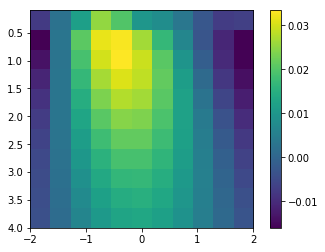

In [58]:
# Answer
B_r = B_est.reshape(11, 11)
# equivalently:
B_r2 = np.reshape(B_est, (11,11))
print(B_r.shape)
print(B_r2.shape)

plt.imshow(B_r, extent=(-2, 2, 4, 0.1))
plt.colorbar()

> How could you reduce the number of $\beta$ values in this example? 


> What might you do to make the OLS fit better? 


> What are the advantages of each approach (nonlinear vs linearized regression estimates of model parameters)?